In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import initdirs

In [2]:
import os
import cv2
import math
import multiprocessing as mp
from matplotlib import pyplot as plt
import networkx as nx
from glob import glob
import nxpd

nxpd.nxpdParams['show'] = 'ipynb'

In [3]:
from epypes import pipeline
from epypes import compgraph

from visioncg import cbcalib
from visioncg.io import open_image, sorted_glob

In [4]:
imfiles1 = sorted_glob(os.path.join(initdirs.DATA_DIR, 'opencv_cb_left/*.jpg'))
imfiles2 = sorted_glob(os.path.join(initdirs.DATA_DIR, 'opencv_cb_right/*.jpg'))

images1 = [open_image(f, cv2.IMREAD_GRAYSCALE) for f in imfiles1]
images2 = [open_image(f, cv2.IMREAD_GRAYSCALE) for f in imfiles2]

psize = (9, 6)
sq_size = 10
im_wh = cbcalib.get_im_wh(images1[0])

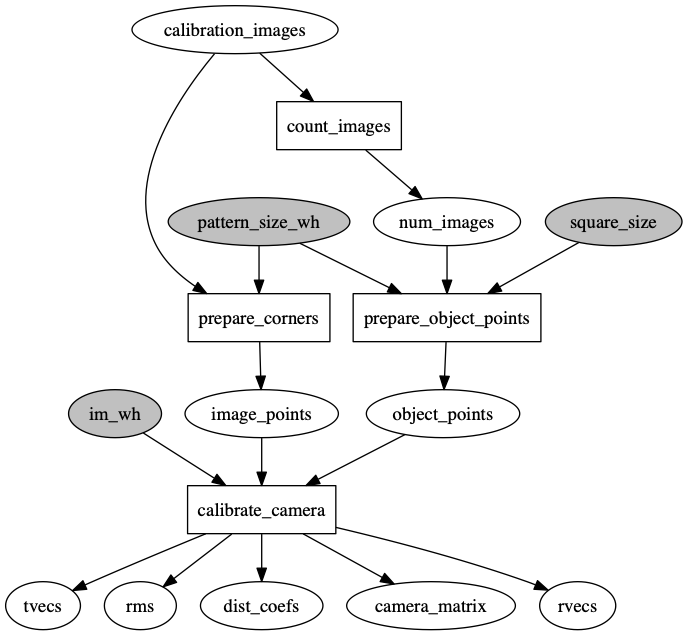

In [5]:
cg_calib = cbcalib.CGCalibrateCamera()

calib_runner = compgraph.CompGraphRunner(cg_calib, frozen_tokens={
    'im_wh': im_wh,
    'pattern_size_wh': psize,
    'square_size': sq_size
    
})

nxpd.draw(calib_runner.to_networkx())

In [6]:
calib_runner.run(calibration_images=images1)
cm1 = calib_runner['camera_matrix']
dc1 = calib_runner['dist_coefs']

calib_runner.run(calibration_images=images2)
cm2 = calib_runner['camera_matrix']
dc2 = calib_runner['dist_coefs']

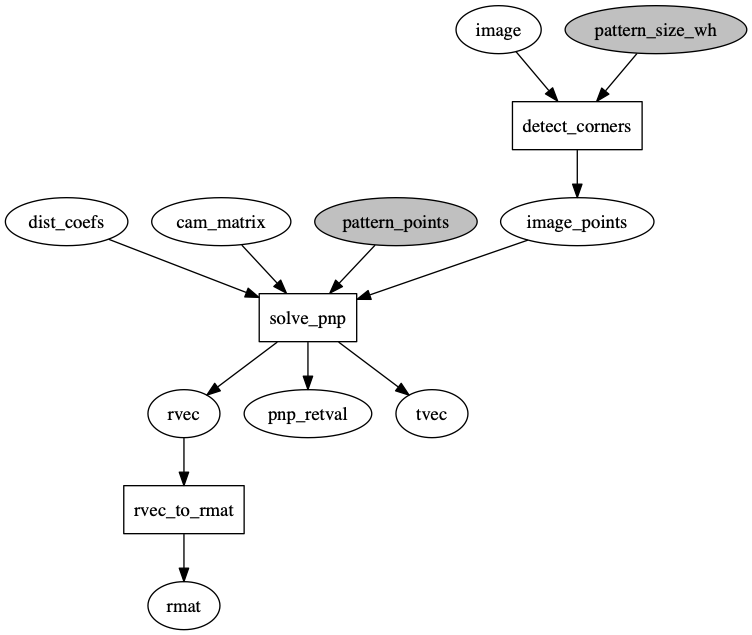

In [7]:
cg_pnp = cbcalib.CGSolvePnP()

pnp_params = {
    'pattern_points': calib_runner['object_points'][0],
    'pattern_size_wh': psize,
}

pnp_runner = compgraph.CompGraphRunner(cg_pnp, pnp_params)

nxpd.draw(pnp_runner.to_networkx())

In [8]:
pnp_runner.run(
    image=images1[0],
    cam_matrix=cm1,
    dist_coefs=dc1
)

In [9]:
print('Rotation matrix:')
print(pnp_runner['rmat'])

print('Translation vector:')
print(pnp_runner['tvec'])

Rotation matrix:
[[ 0.96258865  0.00974887  0.27079153]
 [ 0.03552137  0.98618852 -0.16177277]
 [-0.2686286   0.16533952  0.94894758]]
Translation vector:
[[-30.14912192]
 [-43.07123578]
 [158.98021091]]
